In [1]:
import sys
sys.path.append('../cmake-build-release-gcc/src/python/')
import pyslise as ps

In [2]:
n = 2

def Vpt(x, n, a):
    return -n/cosh(a*x)^2

def f(x):
    v0 = Vpt(x, 45., 1.)
    v1 = Vpt(x, 39./2, 1./2)
    return matrix(RDF, [[v0+v1, v0-v1], [v0-v1,v0+v1]])
    
M = 20
scs = ps.Pyscs(f, n, 0, M, steps=64)

In [3]:
def psi(y, dy):
    return matrix(RDF, dy)*~matrix(RDF, y)

y0 = matrix.identity(RDF, n)
dy0 = matrix.zero(RDF, n, n)
E = -64
y, dy = scs.propagate(E, [y0, dy0], 0, .1)[0]

In [4]:
scs.propagatePsi(E, psi(y0, dy0), 0, .1)

array([[0.10093332, 0.00852565],
       [0.00852565, 0.10093332]])

In [5]:
psi(y, dy)

[-0.25227312536659025   -2.565818515195242]
[  -2.565818515195242 -0.25227312536658936]

In [6]:
E = -64
m = scs.match
scs.propagatePsi(E, [[0,0],[0,0]], 0, m) - scs.propagatePsi(E, [[0,0],[0,0]], M, m)

array([[ 0.1876469 , -0.18763464],
       [-0.18763464,  0.1876469 ]])

In [36]:
for i in range(scs.sectorCount):
    s = scs.sector(i)
    print i, s.min, s.max, s.backward

0 0.0 0.3125 False
1 0.3125 0.625 True
2 0.625 0.9375 True
3 0.9375 1.25 True
4 1.25 1.5625 True
5 1.5625 1.875 True
6 1.875 2.1875 True
7 2.1875 2.5 True
8 2.5 2.8125 True
9 2.8125 3.125 True
10 3.125 3.4375 True
11 3.4375 3.75 True
12 3.75 4.0625 True
13 4.0625 4.375 True
14 4.375 4.6875 True
15 4.6875 5.0 True
16 5.0 5.3125 True
17 5.3125 5.625 True
18 5.625 5.9375 True
19 5.9375 6.25 True
20 6.25 6.5625 True
21 6.5625 6.875 True
22 6.875 7.1875 True
23 7.1875 7.5 True
24 7.5 7.8125 True
25 7.8125 8.125 True
26 8.125 8.4375 True
27 8.4375 8.75 True
28 8.75 9.0625 True
29 9.0625 9.375 True
30 9.375 9.6875 True
31 9.6875 10.0 True
32 10.0 10.3125 True
33 10.3125 10.625 True
34 10.625 10.9375 True
35 10.9375 11.25 True
36 11.25 11.5625 True
37 11.5625 11.875 True
38 11.875 12.1875 True
39 12.1875 12.5 True
40 12.5 12.8125 True
41 12.8125 13.125 True
42 13.125 13.4375 True
43 13.4375 13.75 True
44 13.75 14.0625 True
45 14.0625 14.375 True
46 14.375 14.6875 True
47 14.6875 15.0 True
48 1

In [52]:
y, dy

(array([[ 1.0006018 , -0.12711012],
        [-0.12711012,  1.0006018 ]]), array([[ 0.07371655, -2.53529617],
        [-2.53529617,  0.07371655]]))

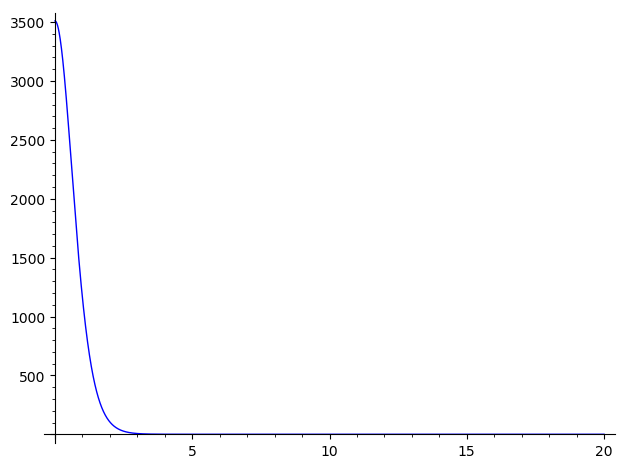

In [3]:
plot(lambda x: det(f(x)), (0, M))

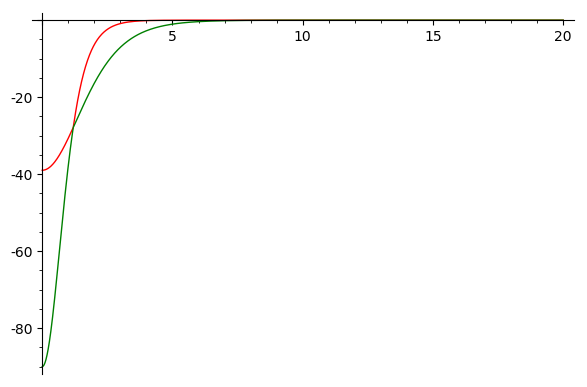

In [4]:
plot(lambda x: f(x).eigenvalues()[0], (0, M), color="red") + plot(lambda x: f(x).eigenvalues()[1], (0, M), color="green")

In [5]:
y0 = [matrix.zero(n), matrix.identity(n)]
scs.propagate(3, y0, 0, 2)

((array([[-0.05341064,  0.1199489 ],
         [ 0.1199489 , -0.05341064]]), array([[0.41337786, 0.13290044],
         [0.13290044, 0.41337786]])), (array([[0.02154518, 0.00592006],
         [0.00592006, 0.02154518]]), array([[ 0.06276135, -0.07861589],
         [-0.07861589,  0.06276135]])))

In [6]:
def error(E):
    (yl, dyl),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 0,5)
    (yr, dyr),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 10,5)
    return matrix(RDF, dyl*yl^-1 - dyr*yr^-1).det()

def error2(E):
    return matrix(scs.propagatePsi(E, matrix.identity(2), 0, 5) - scs.propagatePsi(E, matrix.identity(2), 10, 5)).det()

def prop(E, start, end, begin):
    t = ode_solver()
    t.function = lambda x, y: y[2:4]+list(f(x)*vector(y[0:2]) - E*vector(y[0:2]))
    t.t_span = [start, end]
    t.y_0 = begin
    return t

In [7]:
E = -64
B = 0
t = prop(E, B, M, [0,0,1,0])
t.ode_solve(num_points=100)
s = prop(E, B, M, [0,0,0,1])
s.ode_solve(num_points=100)

In [7]:
def sm_eig(m):
    return min((abs(e), e) for e in matrix(m).eigenvalues())[1]
def detm(m):
    return det(matrix(m))

dets = [(x, detm([y0[2:], y1[2:]])) for (x, y0), (_, y1) in zip(t.solution, s.solution)]

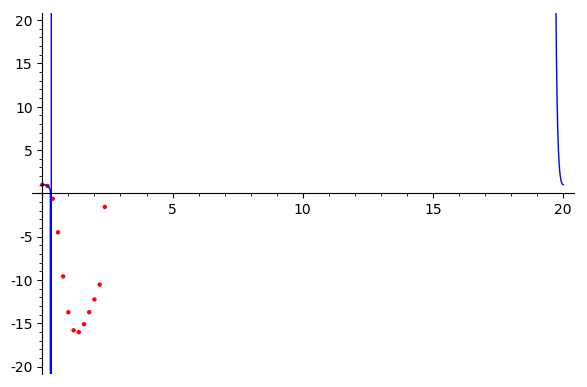

In [9]:
(
    list_plot(dets, color="red")
    + plot(lambda x: detm(scs.propagate(E,  (matrix.zero(2), [[1,0],[0,1]]), B if x < scs.match else M, x)[0][1]), (B,M))
).show(ymax=20, ymin=-20)

In [17]:
scs.match

0.3125

In [24]:
for i in range(scs.sectorCount):
    s = scs.sector(i)
    print s.min, s.max, s.backward

0.0 0.078125 False
0.078125 0.15625 True
0.15625 0.234375 True
0.234375 0.3125 True
0.3125 0.390625 True
0.390625 0.46875 True
0.46875 0.546875 True
0.546875 0.625 True
0.625 0.703125 True
0.703125 0.78125 True
0.78125 0.859375 True
0.859375 0.9375 True
0.9375 1.015625 True
1.015625 1.09375 True
1.09375 1.171875 True
1.171875 1.25 True
1.25 1.328125 True
1.328125 1.40625 True
1.40625 1.484375 True
1.484375 1.5625 True
1.5625 1.640625 True
1.640625 1.71875 True
1.71875 1.796875 True
1.796875 1.875 True
1.875 1.953125 True
1.953125 2.03125 True
2.03125 2.109375 True
2.109375 2.1875 True
2.1875 2.265625 True
2.265625 2.34375 True
2.34375 2.421875 True
2.421875 2.5 True
2.5 2.578125 True
2.578125 2.65625 True
2.65625 2.734375 True
2.734375 2.8125 True
2.8125 2.890625 True
2.890625 2.96875 True
2.96875 3.046875 True
3.046875 3.125 True
3.125 3.203125 True
3.203125 3.28125 True
3.28125 3.359375 True
3.359375 3.4375 True
3.4375 3.515625 True
3.515625 3.59375 True
3.59375 3.671875 True
3.67187

In [7]:
def psi_calculator(y0, y1):
    den = matrix([y0[2:], y1[2:]])
    if abs(det(den)) < 0.00000001:
        return matrix.identity(2)
    return matrix([y0[:2], y1[:2]]) / den
psis = [(x, sm_eig(psi_calculator(y0, y1))) for (x, y0), (_, y1) in zip(t.solution, s.solution)]

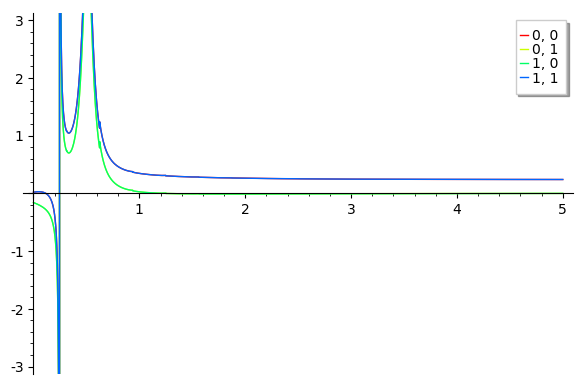

In [8]:
#(list_plot(psis, color="red")
E = -70
def check(m):
    return matrix(scs.propagatePsi(E,  [[0,0],[0,0]], B, m)) - matrix(scs.propagatePsi(E, [[0,0],[0,0]], 10, m))

sum(plot(lambda m: check(m)[i][j], (0,5), color=hue((2*i+j)/5), legend_label="%d, %d"%(i,j)) for i in range(2) for j in range(2)).show(ymin=-3, ymax=3)

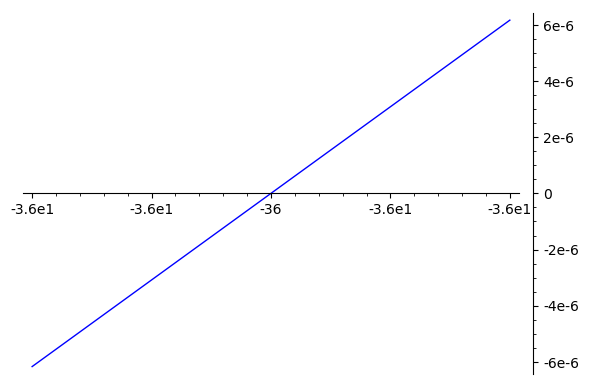

In [9]:
d = 0.0001

def error(E):
    m = .6
    return detm(scs.propagatePsi(E, matrix.zero(2), 0, m) - scs.propagatePsi(E, matrix.zero(2), 10, m))

plot(lambda E: error(E), (-36-d,-36+d))

In [10]:
E = find_root(error, -60, -64.003)
print E
x= 3

def prop(x, start=0, start_Y=matrix.zero(2), start_dY=matrix.identity(2)):
    (y, _), _ = scs.propagate(E, (start_Y, start_dY), start,x)
    return matrix(y).det()


-64.0000001322


In [60]:
error(-64.0000008697)

5.536129617045921e-05

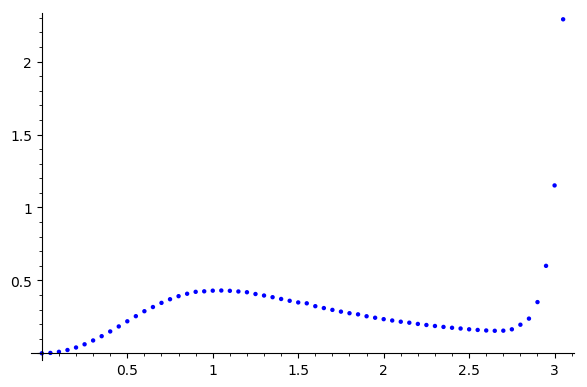

In [61]:
step_size = 0.05
xs = [0.]
ys = [matrix.zero(2)]
dys = [matrix.identity(2)]
scaling = [1]

x = 0
while x < 3:
    x += step_size
    (y, dy), _ = scs.propagate(E, (ys[-1], dys[-1]), xs[-1], x)
    
    f = matrix(y).norm()
    scaling.append(scaling[-1]*f)
    xs.append(x)
    ys.append(y/f)
    dys.append(dy/f)

list_plot(zip(xs, map(det, map(matrix, [y*s for s, y in zip(scaling, ys)]))))

In [66]:
m.rows()

NameError: name 'm' is not defined

In [126]:
dy

array([[ 5.49212455, -5.49212455],
       [-5.49212455,  5.49212455]])